# user_spec data

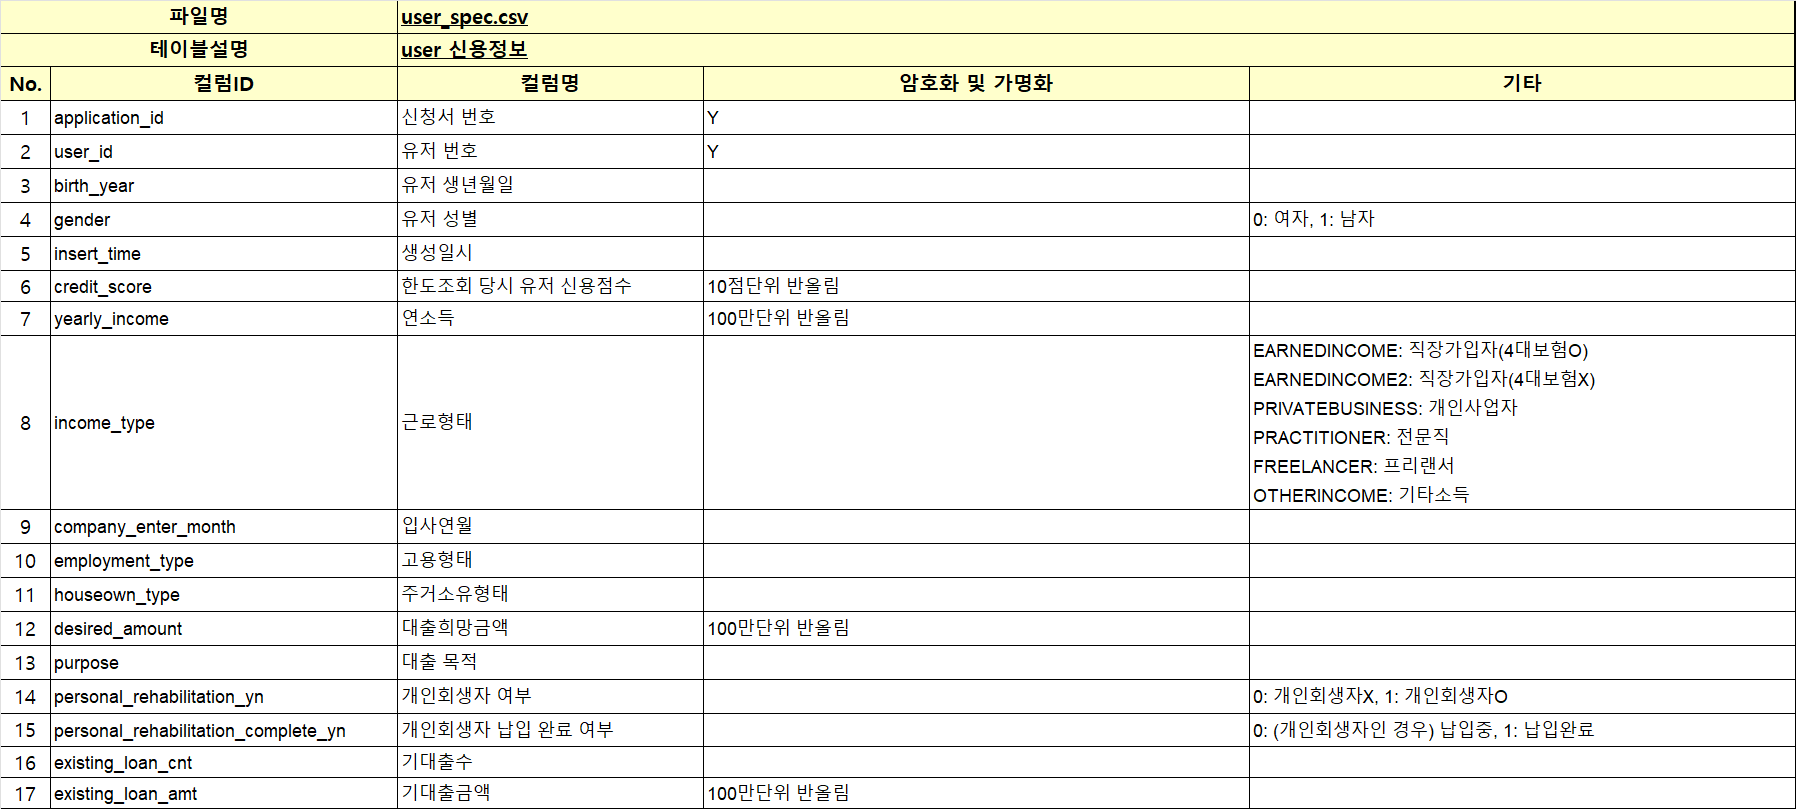

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user_spec = pd.read_csv('user_spec.csv')

In [3]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

## user_data 결측치 퍼센트 확인 In[4]

In [8]:
user_spec_missing = user_spec
np.sum(user_spec_missing.isnull())
missing_number = user_spec_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(user_spec_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
personal_rehabilitation_complete_yn,1203354,86.310443
personal_rehabilitation_yn,587461,42.135580
existing_loan_amt,313774,22.505408
existing_loan_cnt,198556,14.241409
company_enter_month,171760,12.319468
credit_score,105115,7.539363
gender,12961,0.929626
birth_year,12961,0.929626
yearly_income,90,0.006455
income_type,85,0.006097


In [9]:
print('서로다른 value 개수')
li3 = ['application_id', 'user_id', 'birth_year', 'gender', 'insert_time',
       'credit_score', 'yearly_income', 'income_type', 'company_enter_month',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn',
       'existing_loan_cnt', 'existing_loan_amt']
user_spec[li3].nunique()

서로다른 value 개수


application_id                         1394216
user_id                                 405213
birth_year                                  81
gender                                       2
insert_time                            1265510
credit_score                                91
yearly_income                              696
income_type                                  6
company_enter_month                       6719
employment_type                              4
houseown_type                                4
desired_amount                             558
purpose                                      8
personal_rehabilitation_yn                   2
personal_rehabilitation_complete_yn          2
existing_loan_cnt                          100
existing_loan_amt                         1002
dtype: int64

In [10]:
user_spec['purpose'].value_counts()

생활비       881511
대환대출      357042
사업자금       63050
기타         30725
전월세보증금     27798
주택구입       17778
투자         12698
자동차구입       3529
Name: purpose, dtype: int64

##  영어로 표기된 'purpose'를 한국어로 통일시키기 In[7]

In [11]:
user_spec['purpose'] = user_spec['purpose'].str.replace('LIVING','생활비')
user_spec['purpose'] = user_spec['purpose'].str.replace('SWITCHLOAN','대환대출')
user_spec['purpose'] = user_spec['purpose'].str.replace('BUSINESS','사업자금')
user_spec['purpose'] = user_spec['purpose'].str.replace('ETC','기타')
user_spec['purpose'] = user_spec['purpose'].str.replace('HOUSEDEPOSIT','전월세보증금')
user_spec['purpose'] = user_spec['purpose'].str.replace('BUYHOUSE','주택구입')
user_spec['purpose'] = user_spec['purpose'].str.replace('INVEST','투자')
user_spec['purpose'] = user_spec['purpose'].str.replace('BUYCAR','자동차구입')

## <center>**company_enter_month 열의 경우 In[8]**</center>   
### 1 예측을 하여 채워넣을 수 없다는 점
### 2 모든 이직 및 취업의 기록이 없다는 점(회사 이동 등)
### 1, 2의 이유로 열 삭제

In [12]:
user_spec = user_spec.drop(['company_enter_month'], axis=1)

## <center>**credit_score 열의 경우 In[9]**</center>   
### 1. 회귀를 통하여 결측치를 채워 넣기에 대출에 있어 매우 중요한 기본 배경을 바탕으로 하여금, <br>열삭제 대신, 약 10만개의 결측치를 삭제
### -> 약 10만개의 결측치는 제공받은 user_spec data 중 약 7.5%를 차지함

In [13]:
user_spec = user_spec.dropna(subset=['credit_score'])

## <center>**개인회생자 여부 및 납임완료 여부 열의 경우 In[10]**</center>  
### 개인회생자 여부(personal_rehabilitation_yn)<br> -> 0이면 x, 1이면 개인회생자 
### 개인회생자 납입완료 여부(personal_rehabilitation_complete_yn)  <br> -> (개인회생자 중) 0이면 납입중, 1이면 납입완료 라는 제공 데이터 정의서를 바탕으로,
### personal_rehabilitation_yn = 0 , personal_rehabilitation_complete_yn = NA 인 데이터 -> NA를 1로 채우기

In [14]:
user_spec['personal_rehabilitation_complete_yn'] = user_spec[user_spec['personal_rehabilitation_yn']==0]['personal_rehabilitation_complete_yn'].fillna(1)

In [15]:
user_spec_missing = user_spec
np.sum(user_spec_missing.isnull())
missing_number = user_spec_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(user_spec_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
personal_rehabilitation_complete_yn,543299,42.145573
personal_rehabilitation_yn,531959,41.265890
existing_loan_amt,234070,18.157615
existing_loan_cnt,121246,9.405469
birth_year,11243,0.872158
gender,11243,0.872158
yearly_income,86,0.006671
income_type,82,0.006361
employment_type,82,0.006361
houseown_type,82,0.006361


## age 열을 만들기 위한 기초 함수 생성 및 적용 In[12]~[15]

In [16]:
def ages(x):
    if 0<= x < 10:
        return '10대 미만'
    elif 10<= x < 20 :
            return '10대'
    elif 20<= x < 30 :
            return '20대'
    elif 30<= x < 40 :
            return '30대'
    elif 40<= x < 50 :
            return '40대'
    elif 50<= x < 60 :
            return '50대'
    else:
        return '60대 이상'

In [17]:
# 2022년 기준으로 생성
user_spec['age'] = 2022-user_spec['birth_year']

In [18]:
# 2022년 기준 10대 미만~ 60대 이상으로 구분
user_spec['ages'] = user_spec.apply(lambda x: ages( x['age']), axis=1)

In [19]:
user_spec['ages'].value_counts()

30대       425591
40대       363052
20대       280914
50대       156556
60대 이상     61274
10대         1714
Name: ages, dtype: int64

## personal_rehabilitation_yn, personal_rehabilitation_complete_yn 열의 경우 In[16]~[26]
### 결측치가 매우 많지만, 개인회생자 여부와, 납입 완료 여부는 대출 여부에 중요한 역할을 할것이라 예상
### user_id 별, 개인회생자 여부와, 납인 완료 여부의 평균을 내어 0과 1의 값만이 존재할 경우, NA값을 0과 1로 대체
### 그 외의 0< value < 1의 값을 가질 경우 그 행은 제거

In [20]:
def group(x):
    if  x == 0:
        return 0
    elif x ==1:
        return 1
    else:
        return 100

In [21]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,ages
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,기타,자가,1000000.0,기타,0.0,1.0,4.0,162000000.0,37.0,30대
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,54.0,50대
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,기타,기타가족소유,10000000.0,생활비,0.0,1.0,5.0,15000000.0,25.0,20대
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,정규직,자가,2000000.0,생활비,0.0,1.0,7.0,344000000.0,33.0,30대
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,22.0,20대


In [22]:
individual_mean = user_spec.groupby(['user_id'])['personal_rehabilitation_yn'].mean()
individual_mean.to_csv('individual_mean.csv')
individual_mean = pd.read_csv('individual_mean.csv')
individual_mean.rename(columns={'personal_rehabilitation_yn':'individual_mean'}, inplace=True)

In [23]:
individual_complete_mean = user_spec.groupby('user_id')['personal_rehabilitation_complete_yn'].mean()
individual_complete_mean.to_csv('individual_complete_mean.csv')
individual_complete_mean = pd.read_csv('individual_complete_mean.csv')
individual_complete_mean.rename(columns={'personal_rehabilitation_complete_yn':'individual_complete_mean'}, inplace=True)

In [24]:
user_spec = pd.merge(user_spec, individual_mean, on='user_id', how='inner' )

In [25]:
user_spec['personal_rehabilitation_yn'] = user_spec.apply(lambda x: group( x['individual_mean']), axis=1)

In [26]:
user_spec = user_spec[user_spec['personal_rehabilitation_yn'] !=100]

In [27]:
user_spec = pd.merge(user_spec, individual_complete_mean, on='user_id', how='inner' )

In [28]:
user_spec['personal_rehabilitation_complete_yn'] = user_spec.apply(lambda x: group( x['individual_complete_mean']), axis=1)

In [29]:
user_spec = user_spec[user_spec['personal_rehabilitation_complete_yn'] !=100]

In [30]:
user_spec_missing = user_spec
np.sum(user_spec_missing.isnull())
missing_number = user_spec_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(user_spec_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
existing_loan_amt,163134,15.270058
existing_loan_cnt,67706,6.337579
birth_year,6730,0.629958
gender,6730,0.629958
age,6730,0.629958
yearly_income,57,0.005335
desired_amount,54,0.005055
income_type,54,0.005055
employment_type,54,0.005055
houseown_type,54,0.005055


In [31]:
user_spec.sort_values(['user_id',"insert_time"], inplace = True)

In [32]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068326 entries, 1082518 to 896979
Data columns (total 20 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1068326 non-null  int64  
 1   user_id                              1068326 non-null  int64  
 2   birth_year                           1061596 non-null  float64
 3   gender                               1061596 non-null  float64
 4   insert_time                          1068326 non-null  object 
 5   credit_score                         1068326 non-null  float64
 6   yearly_income                        1068269 non-null  float64
 7   income_type                          1068272 non-null  object 
 8   employment_type                      1068272 non-null  object 
 9   houseown_type                        1068272 non-null  object 
 10  desired_amount                       1068272 non-null  float6

## <center>**desired_amount(대출희망금액) 열의 경우 In[29]**</center>   
### 데이터 정의서에 의해 100만 단위 반올림으로 표기되어 있음 <br> -> 0으로 표기되어 데이터는 모델 학습에 영향을 줄 것이라 생각하여 행 삭제<br> ->총 3099개의 데이터 삭제

In [33]:
user_spec = user_spec[user_spec['desired_amount']!=0]

## <center>**birth_year, gender, age 열의 경우 In[30]**</center>   
### 총 6730개의 결측치로, 임의로 채워넣을 수 없는 데이터이기때문에 결측치 행 삭제

In [34]:
user_spec.dropna(subset=['birth_year','income_type','yearly_income'], inplace=True)

C:\Users\ghaud\AppData\Local\Temp\ipykernel_8572\2782977978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_spec.dropna(subset=['birth_year','income_type','yearly_income'], inplace=True)


In [35]:
user_spec_missing = user_spec
np.sum(user_spec_missing.isnull())
missing_number = user_spec_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(user_spec_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
existing_loan_amt,159913,15.107168
existing_loan_cnt,65608,6.198064
application_id,0,0.000000
user_id,0,0.000000
individual_mean,0,0.000000
ages,0,0.000000
age,0,0.000000
personal_rehabilitation_complete_yn,0,0.000000
personal_rehabilitation_yn,0,0.000000
purpose,0,0.000000


# 

## <center>**existing_loan_amt 열의 경우 In[32]**</center>   
### 같은 user_id끼리 existing_loan_amt의 결측치가 존재하기때문에 <br>(근거 : user_id별로 생성한 individual_mean_minus_loan의 결측치와 갯수 동일) 
### 근거를 확인하기 위해서는, In[32]열을 In[38] 뒤에 실행시키면 확인 가능

In [36]:
user_spec.dropna(subset=['existing_loan_amt'], inplace=True)

## <center>**연소득 대비 기대출 비율이 100%가 넘어버리면 대출이 어렵다는 정보를 토대로, In[33]~[38]**</center>
### 1. (기대출금액/연소득) *100의 값을 over_loan이라는 새로운 열 생성
### 2. (연소득-기대출금액) 의 값을 minus_loan이라는 새로운 열 생성
### 3. 연소득 - user_id 별 mean(연소득-기대출금액)의 값을 individual_mean_minus_loan이라는 새로운 열 생성
### 이 열들이 대출에 영향을 주는가에 대하여 파악(모델생성을 할때 위의 세가지 열을 넣고, 뺌을 모두 시행 예정) 

In [37]:
user_spec['over_loan'] = (user_spec['existing_loan_amt']/user_spec['yearly_income'])*100

In [38]:
user_spec['minus_loan'] = user_spec['yearly_income']- user_spec['existing_loan_amt']

In [39]:
group_loan_mean = user_spec.groupby(['user_id'])['existing_loan_amt'].mean()

In [40]:
group_loan_mean.to_csv('group_loan_mean.csv')
group_loan_mean = pd.read_csv('group_loan_mean.csv')
group_loan_mean.rename(columns={'existing_loan_amt':'group_mean'}, inplace=True)

In [41]:
user_spec = pd.merge(user_spec, group_loan_mean, on='user_id', how='inner' )

In [42]:
user_spec['individual_mean_minus_loan'] = user_spec['yearly_income']- user_spec['group_mean']

In [43]:
user_spec_missing = user_spec
np.sum(user_spec_missing.isnull())
missing_number = user_spec_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(user_spec_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
over_loan,72,0.008012
application_id,0,0.000000
user_id,0,0.000000
group_mean,0,0.000000
minus_loan,0,0.000000
individual_complete_mean,0,0.000000
individual_mean,0,0.000000
ages,0,0.000000
age,0,0.000000
existing_loan_amt,0,0.000000


### over_loan의 결측치의 경우 existing_loan_amt 행의 값이 모두 0임을 확인.In[40]~[41]
### 따라서 over_loan의 결측치는 제거하지 않고, 0으로 채우기 실행

In [44]:
user_spec[user_spec['over_loan'].isna()==True]['existing_loan_amt'].mean()

0.0

In [45]:
user_spec['over_loan'] = user_spec['over_loan'].fillna(0)

In [46]:
user_spec_missing = user_spec
np.sum(user_spec_missing.isnull())
missing_number = user_spec_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(user_spec_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
application_id,0,0.0
user_id,0,0.0
group_mean,0,0.0
minus_loan,0,0.0
over_loan,0,0.0
individual_complete_mean,0,0.0
individual_mean,0,0.0
ages,0,0.0
age,0,0.0
existing_loan_amt,0,0.0


In [47]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898611 entries, 0 to 898610
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   application_id                       898611 non-null  int64  
 1   user_id                              898611 non-null  int64  
 2   birth_year                           898611 non-null  float64
 3   gender                               898611 non-null  float64
 4   insert_time                          898611 non-null  object 
 5   credit_score                         898611 non-null  float64
 6   yearly_income                        898611 non-null  float64
 7   income_type                          898611 non-null  object 
 8   employment_type                      898611 non-null  object 
 9   houseown_type                        898611 non-null  object 
 10  desired_amount                       898611 non-null  float64
 11  purpose      

## <center>**제공된 타 데이터(loan_result, log_data)와 merge할 최종 user_spec data**</center>   
### 첫 제공 데이터의 약 64.45%에 해당하는 898611개 사용 In[43]

In [43]:
print(len(user_spec)/1394216)
print(len(user_spec))

0.6445278206533277
898611


# 

# loan_result

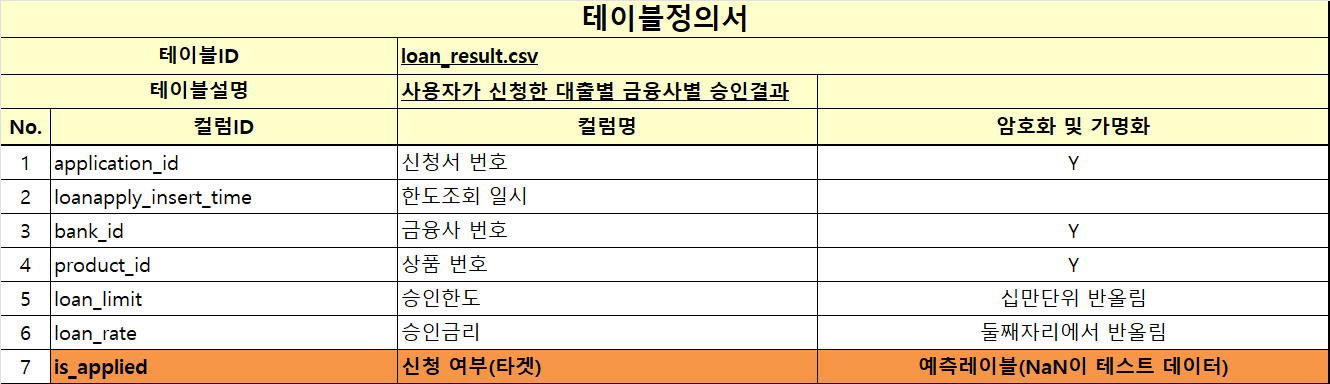

In [44]:
loan_result = pd.read_csv('loan_result.csv')

In [45]:
loan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [46]:
loan_result_missing = loan_result
np.sum(loan_result_missing.isnull())
missing_number = loan_result_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(loan_result_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
is_applied,3257239,24.078891
loan_limit,7495,0.055406
loan_rate,7495,0.055406
application_id,0,0.000000
loanapply_insert_time,0,0.000000
bank_id,0,0.000000
product_id,0,0.000000


## FAQ에서 제공해준 정보를 토대로, loan_limit가 결측치인 행 삭제 In[47]

In [47]:
loan_result = loan_result.dropna(subset = ['loan_limit'])

In [48]:
print('서로다른 value 개수')
li1 = ['application_id','loanapply_insert_time','bank_id','product_id','loan_limit','loan_rate','is_applied']
loan_result[li1].nunique()

서로다른 value 개수


application_id            968727
loanapply_insert_time    3217054
bank_id                       63
product_id                   171
loan_limit                   646
loan_rate                    173
is_applied                     2
dtype: int64

# 다운샘플링해야할거 같은데..??

In [49]:
loan_result['is_applied'].value_counts()

0.0    9709675
1.0     554711
Name: is_applied, dtype: int64

# 예측해야하는 데이터

pred_data = loan_result[loan_result['is_applied'].isna()==True]

# 예측 데이터 제외한 데이터

loan_result1 = loan_result[loan_result['is_applied'].isna()==False]

# 

# log_data

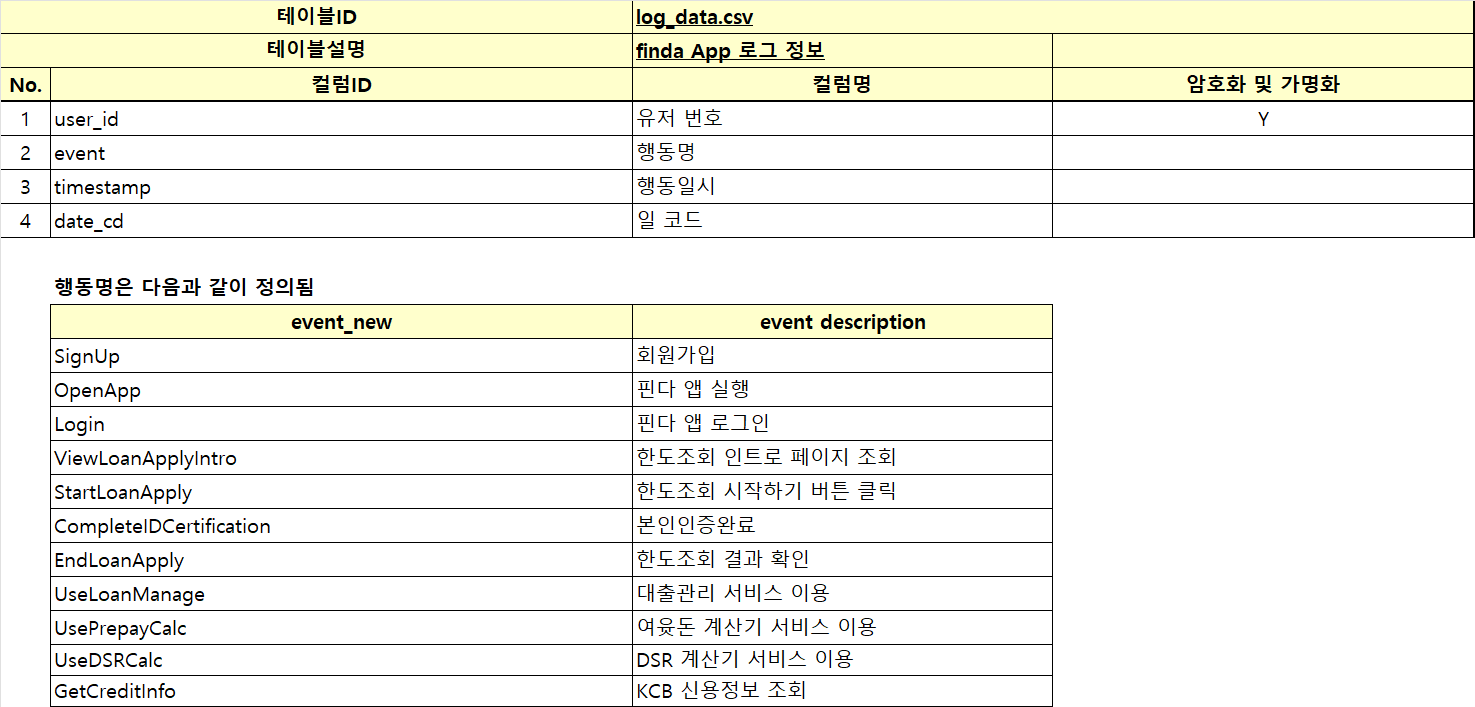

In [50]:
log_data = pd.read_csv('log_data.csv')

## data_cd열을 time으로 Dtype 바꾸고, 요일 생성 In[51]

In [51]:
log_data['date_cd'] = pd.to_datetime(log_data['date_cd']) # 날짜로 변경
log_data['day_week'] = log_data['date_cd'].dt.dayofweek #요일 (월 = 0)

##  <center>**In[52]~In[55]**</center>
### log_data에서 시간별(timestamp)로 정렬
### 'user_id','event','date_cd'가 모두 중복인 값들 중, 마지막 시간에 입력된 값만 살릴것.
### <center>**event 열의 경우**</center>   
### SignUp~ComepleteIDCertification의 경우, 대출에 영향을 주지 않는다는 판단 <br> -> 그 외의 event만 남김

In [52]:
log_data.sort_values("timestamp", inplace = True)

In [53]:
from datetime import datetime

log_data['month'] = log_data['date_cd'].dt.month #월<Br>
log_data['day'] = log_data['date_cd'].dt.day #일

In [54]:
li = ['EndLoanApply','UseLoanManage','UsePrepayCalc',
                        'UseDSRCalc','GetCreditInfo']
log_data_last = log_data[log_data['event'].isin(li)]

In [55]:
log_data_last = log_data_last[log_data_last.duplicated(['user_id','event','date_cd'],keep='last')==False]

In [56]:
len(log_data_last)

3501289

## <center>**mp_os 열의 경우In[57]**</center>
### (andriod, Andriod), (iOS, IPadOS) 그룹별 같다고 판단 <br> android -> Android,   iPadOS -> iOS로 변경

In [57]:
log_data_last['mp_os'] = log_data_last['mp_os'].str.replace('android','Android')
log_data_last['mp_os'] = log_data_last['mp_os'].str.replace('iPadOS','iOS')

In [58]:
log_data_missing = log_data_last
np.sum(log_data_missing.isnull())
missing_number = log_data_missing.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_number/len(log_data_missing))*100
missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
missing_info

,missing number,missing percentage
mp_app_version,106823,3.050962
mp_os,417,0.011910
user_id,0,0.000000
event,0,0.000000
timestamp,0,0.000000
date_cd,0,0.000000
day_week,0,0.000000


## <center>**mp_app_version 열의 경우 In[59]~[61]**</center>
### andriod, Android, iOS, iPadOS별 버전이 다 다르고, 앱버전별 앱 사용에 영향을 주지않는다는 판단<br> -> 열 삭제
### 처리 후 결측치의 경우, 한사람이 Android, iOS 둘다 가지고 있는 경우가 있기때문에, 결측치 삭제

In [59]:
log_data_last = log_data_last.drop(['mp_app_version'],axis=1)

In [60]:
log_data_last[log_data_last['user_id']==725353]['mp_os'].value_counts()

Android    19
iOS         1
Name: mp_os, dtype: int64

In [61]:
log_data_last.dropna(subset=['mp_os'], inplace=True)

## 평일과 주말간의 차이 파악을 위한 함수 및 적용In[62]~[63]

In [62]:
def week(x):
    if 0<= x < 4:
        return '평일'
    else:
        return '주말'

In [63]:
log_data_last['week'] = log_data_last.apply(lambda x: week( x['day_week']), axis=1)

In [64]:
len(log_data_last[log_data_last['week']=='주말'])

1089088

In [65]:
len(log_data_last[log_data_last['week']=='평일'])

2411784

# 이게 이제 진짜 우리가 쓸 데이터

In [66]:
df = pd.merge(user_spec, loan_result, on='application_id', how='inner')

In [67]:
df = pd.merge(df,log_data_last, on='user_id', how='inner')

MemoryError: Unable to allocate 1.31 GiB for an array with shape (176448901, 1) and data type float64

In [ ]:
df.info()